In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

STAGE 1

In [2]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import cv2
# --- 1. CẤU HÌNH ---
# Đường dẫn dữ liệu gốc 
source_dir = '/kaggle/input/yolodata'
# Đường dẫn thư mục output 
output_dir = '/kaggle/working/split_yolodata'
# Tỉ lệ chia: 80% cho train, 20% cho valid
train_ratio = 0.8

# --- 2. TẠO THƯ MỤC LƯU TRỮ ---
# Tạo cấu trúc thư mục train/valid cho cả images và labels
for split in ['train', 'valid']:
    os.makedirs(os.path.join(output_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels', split), exist_ok=True)

print(f"Đã tạo cấu trúc thư mục tại: {output_dir}")

# --- 3. CHIA DỮ LIỆU ---
# Lấy danh sách tất cả các file ảnh
images_dir = os.path.join(source_dir, 'images')
all_images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(all_images) # Xáo trộn ngẫu nhiên

# Phân chia danh sách
split_index = int(len(all_images) * train_ratio)
train_images = all_images[:split_index]
valid_images = all_images[split_index:]

print(f"Tổng cộng: {len(all_images)} ảnh.")
print(f"Chia {len(train_images)} ảnh cho tập train.")
print(f"Chia {len(valid_images)} ảnh cho tập valid.")

# --- 4. SAO CHÉP FILE ---
def copy_files(file_list, data_split):
    """Sao chép ảnh và nhãn tương ứng vào thư mục train hoặc valid."""
    image_source_path = os.path.join(source_dir, 'images')
    label_source_path = os.path.join(source_dir, 'labels')
    
    image_dest_path = os.path.join(output_dir, 'images', data_split)
    label_dest_path = os.path.join(output_dir, 'labels', data_split)
    
    for image_file in file_list:
        # Sao chép file ảnh
        shutil.copy(os.path.join(image_source_path, image_file), image_dest_path)
        
        # Sao chép file nhãn tương ứng (thay đổi đuôi file)
        label_file = os.path.splitext(image_file)[0] + '.txt'
        shutil.copy(os.path.join(label_source_path, label_file), label_dest_path)

# Thực hiện sao chép
copy_files(train_images, 'train')
copy_files(valid_images, 'valid')

print("\nHoàn tất! Dữ liệu đã được chia thành công.")

Đã tạo cấu trúc thư mục tại: /kaggle/working/split_yolodata
Tổng cộng: 1066 ảnh.
Chia 852 ảnh cho tập train.
Chia 214 ảnh cho tập valid.

Hoàn tất! Dữ liệu đã được chia thành công.


In [3]:
import yaml

# Đường dẫn đến thư mục chứa dữ liệu 
split_dataset_path = "/kaggle/working/split_yolodata"

# Tên file yaml output
yaml_file = "aerial.yaml"

# Cấu hình dataset cho file YAML
data_yaml = {
    'train': f'{split_dataset_path}/images/train',
    'val': f'{split_dataset_path}/images/valid',
    'nc': 3,
    'names': ['container-crane', 'ship', 'small-vehicle']
}

# Ghi ra file
with open(yaml_file, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False, sort_keys=False)

print(f" File {yaml_file} đã được tạo và trỏ đến đúng dữ liệu đã chia.")

 File aerial.yaml đã được tạo và trỏ đến đúng dữ liệu đã chia.


In [4]:
!cat aerial.yaml


train: /kaggle/working/split_yolodata/images/train
val: /kaggle/working/split_yolodata/images/valid
nc: 3
names:
- container-crane
- ship
- small-vehicle


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8l.pt")

model.train(
    data="aerial.yaml",
    epochs=30,
    imgsz=640,
    batch=4,
    freeze=10,
    name='yolov8n_stage1_training'
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.186 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=aerial.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        213      37214      0.745      0.164      0.203     0.0947
       container-crane          1         17          1          0          0          0
                  ship         67       8246      0.684      0.339       0.41      0.192
         small-vehicle        186      28951       0.55      0.152      0.197     0.0925
Speed: 0.3ms preprocess, 15.3ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/yolov8n_stage1_training


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df97c789b10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## STAGE 2

In [6]:
import os
import shutil
import random

# --- 1. CẤU HÌNH ---
# Thư mục dữ liệu gốc đã được chia
source_dir = '/kaggle/working/split_yolodata'
# Thư mục mới để chứa dữ liệu hỗn hợp cho fine-tuning
output_dir = '/kaggle/working/mixed_finetune_data'

# Class ID của 'container-crane' (Novel class)
TARGET_CLASS_ID = 0 
# Tỷ lệ Base Shots cần giữ lại trong tập train (ví dụ: 20%)
BASE_SHOTS_RATIO = 0.2

print("Bắt đầu tạo bộ dữ liệu fine-tuning hỗn hợp...")

# --- 2. TẠO CÁC THƯ MỤC CẦN THIẾT ---
for split in ['train', 'valid']:
    os.makedirs(os.path.join(output_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels', split), exist_ok=True)

# --- 3. PHÂN LOẠI VÀ XỬ LÝ TẬP TRAIN ---
print("\n--- Xử lý tập Train ---")
novel_shot_files = [] # Chứa các file có class hiếm
base_only_files = []  # Chứa các file chỉ có class nền

train_img_src = os.path.join(source_dir, 'images/train')
train_lbl_src = os.path.join(source_dir, 'labels/train')

for label_file in os.listdir(train_lbl_src):
    if not label_file.endswith('.txt'): continue
        
    full_label_path = os.path.join(train_lbl_src, label_file)
    image_file = os.path.splitext(label_file)[0] + '.png' # Giả sử ảnh là .png
    full_image_path = os.path.join(train_img_src, image_file)
    if not os.path.exists(full_image_path): continue

    file_pair = {'image': full_image_path, 'label': full_label_path}
    found_target = False
    with open(full_label_path, 'r') as f:
        for line in f:
            if int(line.split()[0]) == TARGET_CLASS_ID:
                novel_shot_files.append(file_pair)
                found_target = True
                break
    if not found_target:
        base_only_files.append(file_pair)

print(f"Đã tìm thấy {len(novel_shot_files)} Novel Shots và {len(base_only_files)} Base Shots.")

# Sao chép toàn bộ Novel Shots vào thư mục train mới
train_img_dest = os.path.join(output_dir, 'images/train')
train_lbl_dest = os.path.join(output_dir, 'labels/train')

for file_pair in novel_shot_files:
    shutil.copy(file_pair['image'], train_img_dest)
    shutil.copy(file_pair['label'], train_lbl_dest)

# Lấy một phần Base Shots và sao chép
num_base_shots_to_keep = int(len(base_only_files) * BASE_SHOTS_RATIO)
selected_base_shots = random.sample(base_only_files, num_base_shots_to_keep)

for file_pair in selected_base_shots:
    shutil.copy(file_pair['image'], train_img_dest)
    shutil.copy(file_pair['label'], train_lbl_dest)

print(f"Đã sao chép {len(novel_shot_files)} Novel Shots và {num_base_shots_to_keep} Base Shots vào tập train mới.")


# --- 4. TẠO TẬP VALIDATION (CHỈ CHỨA NOVEL CLASS) ---
print("\n--- Xử lý tập Valid ---")
valid_img_src = os.path.join(source_dir, 'images/valid')
valid_lbl_src = os.path.join(source_dir, 'labels/valid')
valid_img_dest = os.path.join(output_dir, 'images/valid')
valid_lbl_dest = os.path.join(output_dir, 'labels/valid')
valid_count = 0

for label_file in os.listdir(valid_lbl_src):
    full_label_path = os.path.join(valid_lbl_src, label_file)
    with open(full_label_path, 'r') as f:
        for line in f:
            if int(line.split()[0]) == TARGET_CLASS_ID:
                shutil.copy(full_label_path, valid_lbl_dest)
                image_file = os.path.splitext(label_file)[0] + '.png'
                shutil.copy(os.path.join(valid_img_src, image_file), valid_img_dest)
                valid_count += 1
                break
                
print(f"Đã sao chép {valid_count} file chứa Novel Class vào tập valid mới.")
print(f"\n✅ Hoàn tất! Dữ liệu hỗn hợp đã sẵn sàng tại: '{output_dir}'")

Bắt đầu tạo bộ dữ liệu fine-tuning hỗn hợp...

--- Xử lý tập Train ---
Đã tìm thấy 6 Novel Shots và 846 Base Shots.
Đã sao chép 6 Novel Shots và 169 Base Shots vào tập train mới.

--- Xử lý tập Valid ---
Đã sao chép 1 file chứa Novel Class vào tập valid mới.

✅ Hoàn tất! Dữ liệu hỗn hợp đã sẵn sàng tại: '/kaggle/working/mixed_finetune_data'


In [7]:
import yaml
from ultralytics import YOLO

# --- TẠO FILE YAML CHO DỮ LIỆU HỖN HỢP ---
mixed_dataset_path = "/kaggle/working/mixed_finetune_data"
yaml_file = "mixed_finetune.yaml"

data_yaml = {
    'train': f'{mixed_dataset_path}/images/train',
    'val': f'{mixed_dataset_path}/images/valid',
    'nc': 3,
    'names': ['container-crane', 'ship', 'small-vehicle']
}
with open(yaml_file, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False, sort_keys=False)
print(f"\n✅ File '{yaml_file}' đã được tạo.")

# --- TIẾN HÀNH FINE-TUNING VỚI PHƯƠNG PHÁP CHUẨN ---
model = YOLO('runs/detect/yolov8n_stage1_training/weights/best.pt') 

results = model.train(
    data=yaml_file,
    epochs=50,
    imgsz=640,
    batch=4,
    lr0=0.0001,
    freeze=22,
    name='finetune_mixed_data_TFA'
)

print("\n✅ Hoàn tất fine-tuning!")


✅ File 'mixed_finetune.yaml' đã được tạo.
Ultralytics 8.3.186 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=mixed_finetune.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=22, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/yolov8n_stage1_training/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=finetune_mixed_data_TFA, nbs=64, nms=False, opset=None, optimize=False, optimiz

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all          1        385      0.878       0.15      0.162     0.0913
       container-crane          1         17          1          0          0          0
                  ship          1         69      0.635      0.449      0.487      0.274
         small-vehicle          1        299          1          0          0          0
Speed: 0.5ms preprocess, 31.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/finetune_mixed_data_TFA

✅ Hoàn tất fine-tuning!


================ Bắt đầu so sánh hiệu suất trên tập validation =================

Đang đánh giá Model Giai đoạn 1...
Ultralytics 8.3.186 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,921 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4697.5±719.2 MB/s, size: 7840.1 KB)
val: Scanning /kaggle/working/split_yolodata/labels/valid.cache... 214 images, 0 backgrounds, 1 corrupt: 100% ━━━━━━━━━━━━ 214/214 475413.7it/s 0.0s.0s
val: /kaggle/working/split_yolodata/images/valid/P0334.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0565      1.0583]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 0.53it/s 26.6s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        213      37214      0.744      0.164      0.203     0.0951
       container-crane          1         17          1          0          0          0
                  ship         67       8246      0.683      0.339       0.41      0.192
         small-vehicle        186      28951      0.548      0.152      0.198      0.093
Speed: 1.5ms preprocess, 59.1ms inference, 0.0ms loss, 14.2ms postprocess per image
Results saved to runs/detect/eval_stage1

Đang đánh giá Model Giai đoạn 2 (đã fine-tuning)...
Ultralytics 8.3.186 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,921 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3597.0±2032.3 MB/s, size: 6280.9 KB)
val: Scanning /kaggle/working/split_yolodata/labels/valid.cache... 214 images, 0 backgrounds, 1 corrupt: 100% ━━━━━━━━━━━━ 214/214 433614.0it/s 0.0s.0s
val: /kaggle/working/split_yolodata/images/valid/P0334.png: 

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        213      37214      0.743      0.165      0.206     0.0947
       container-crane          1         17          1          0          0          0
                  ship         67       8246      0.686      0.342      0.418      0.192
         small-vehicle        186      28951      0.543      0.152      0.199     0.0922
Speed: 1.5ms preprocess, 51.6ms inference, 0.0ms loss, 24.2ms postprocess per image
Results saved to runs/detect/eval_stage2
 KẾT QUẢ SO SÁNH ===============================
Metric                         | Model Giai đoạn 1         | Model Giai đoạn 2 (Fine-tuned)
--------------------------------------------------------------------------------
mAP50-95(B) cho container-crane | 0.0000                    | 0.0000                     <-- CHỈ SỐ QUAN TRỌNG NHẤT
mAP50-95(B) tổng thể           | 0.0951                    | 0.0947                   
mAP50(B) tổng thể              | 0.2027                    | 0.2057                   
-------

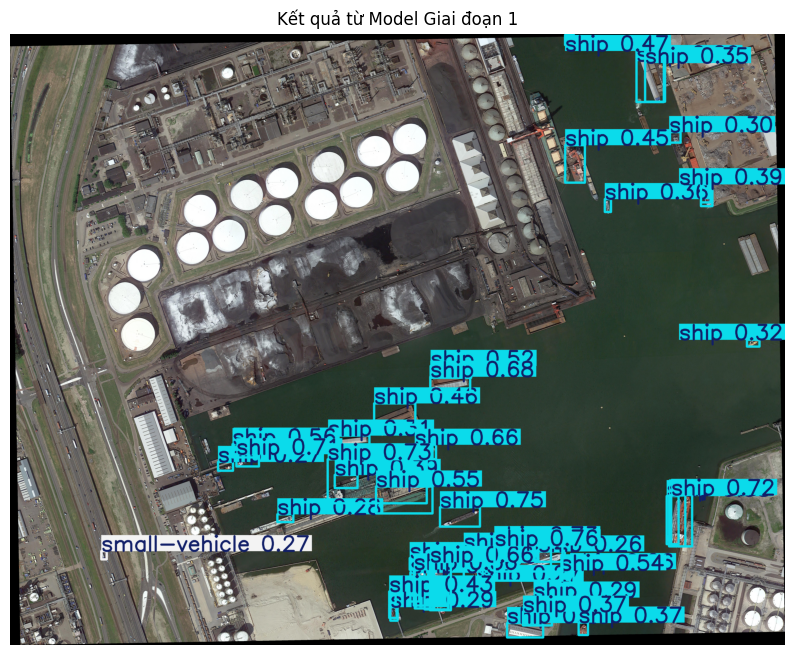


image 1/1 /kaggle/working/mixed_finetune_data/images/valid/P2642.png: 512x640 53 ships, 52.5ms
Speed: 4.1ms preprocess, 52.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


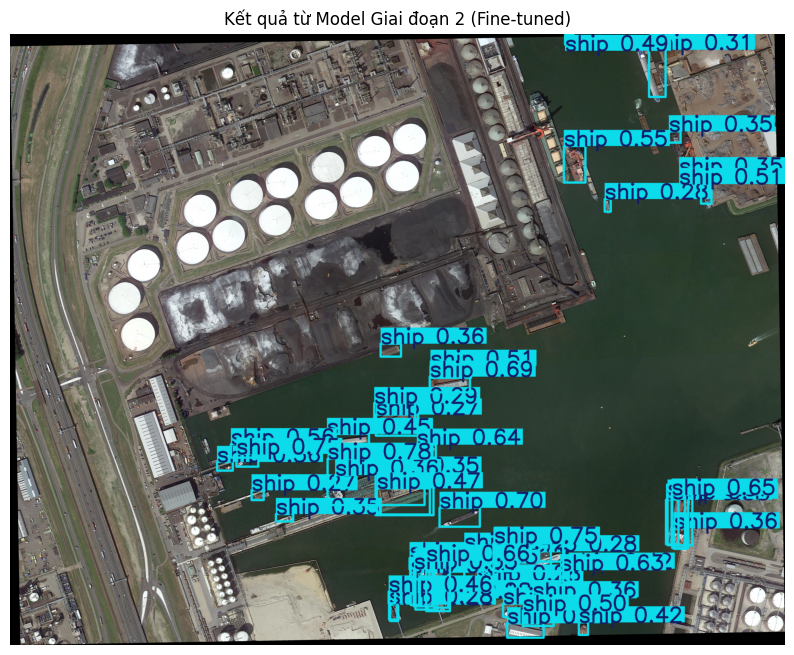


✅ Hoàn tất so sánh và kiểm tra!


In [8]:
import os
import random
from ultralytics import YOLO
from IPython.display import display, Image

# --- 1. CẤU HÌNH CÁC ĐƯỜNG DẪN ---

# Đường dẫn đến file YAML của bộ dữ liệu gốc (có cả 3 class)
# Dùng bộ val gốc để có sự so sánh công bằng trên tất cả các class
original_yaml_path = "aerial.yaml" 

# Đường dẫn đến model Giai đoạn 1 (trước khi fine-tuning)
model_stage1_path = 'runs/detect/yolov8n_stage1_training/weights/best.pt'

# Đường dẫn đến model Giai đoạn 2 (sau khi fine-tuning)
model_stage2_path = 'runs/detect/finetune_mixed_data_TFA/weights/best.pt'

# Đường dẫn đến thư mục chứa ảnh val có class 'container-crane' để test
test_image_dir = '/kaggle/working/mixed_finetune_data/images/valid'


# --- 2. SO SÁNH HIỆU SUẤT QUA CÁC CHỈ SỐ ---

print(" Bắt đầu so sánh hiệu suất trên tập validation ".center(80, "="))

# Tải 2 model
model_s1 = YOLO(model_stage1_path)
model_s2 = YOLO(model_stage2_path)

# Đánh giá model Giai đoạn 1 trên tập val gốc
print("\nĐang đánh giá Model Giai đoạn 1...")
metrics_s1 = model_s1.val(data=original_yaml_path, name='eval_stage1')

# Đánh giá model Giai đoạn 2 trên tập val gốc
print("\nĐang đánh giá Model Giai đoạn 2 (đã fine-tuning)...")
metrics_s2 = model_s2.val(data=original_yaml_path, name='eval_stage2')

print("\n KẾT QUẢ SO SÁNH ".center(80, "="))
print(f"{'Metric':<30} | {'Model Giai đoạn 1':<25} | {'Model Giai đoạn 2 (Fine-tuned)':<25}")
print("-" * 80)

# Lấy mAP50-95 của class 'container-crane' (class index 0)
s1_crane_map = metrics_s1.box.maps[0] 
s2_crane_map = metrics_s2.box.maps[0]

print(f"{'mAP50-95(B) cho container-crane':<30} | {s1_crane_map:<25.4f} | {s2_crane_map:<25.4f}  <-- CHỈ SỐ QUAN TRỌNG NHẤT")
print(f"{'mAP50-95(B) tổng thể':<30} | {metrics_s1.box.map:<25.4f} | {metrics_s2.box.map:<25.4f}")
print(f"{'mAP50(B) tổng thể':<30} | {metrics_s1.box.map50:<25.4f} | {metrics_s2.box.map50:<25.4f}")
print("-" * 80)


# --- 3. KIỂM TRA TRỰC QUAN TRÊN ẢNH THỰC TẾ ---


print("\n Bắt đầu kiểm tra trực quan trên ảnh có 'container-crane' ".center(80, "="))

# Tải lại models nếu cần
model_s1 = YOLO(model_stage1_path)
model_s2 = YOLO(model_stage2_path)

# Lấy ngẫu nhiên ảnh để kiểm tra
try:
    test_images = random.sample(os.listdir(test_image_dir), 5)
except ValueError:
    print("Không đủ ảnh trong thư mục test, lấy tất cả ảnh có sẵn.")
    test_images = os.listdir(test_image_dir)

for img_name in test_images:
    img_path = os.path.join(test_image_dir, img_name)
    print(f"\n--- Ảnh test: {img_name} ---")

    # --- SỬA ĐỔI Ở ĐÂY ---

    # Dự đoán bằng model Giai đoạn 1 và lấy ảnh kết quả trực tiếp
    results_s1 = model_s1.predict(source=img_path)
    annotated_image_s1 = results_s1[0].plot() # .plot() trả về ảnh đã được vẽ

    # Hiển thị ảnh kết quả của Model 1
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image_s1, cv2.COLOR_BGR2RGB))
    plt.title("Kết quả từ Model Giai đoạn 1")
    plt.axis('off')
    plt.show()

    # Dự đoán bằng model Giai đoạn 2 và lấy ảnh kết quả trực tiếp
    results_s2 = model_s2.predict(source=img_path)
    annotated_image_s2 = results_s2[0].plot()

    # Hiển thị ảnh kết quả của Model 2
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image_s2, cv2.COLOR_BGR2RGB))
    plt.title("Kết quả từ Model Giai đoạn 2 (Fine-tuned)")
    plt.axis('off')
    plt.show()

print("\n✅ Hoàn tất so sánh và kiểm tra!")